**POLYNOMIAL REGRESSSION**

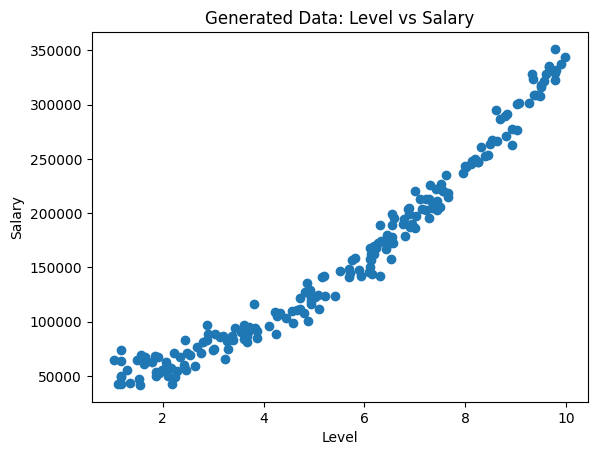

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
n_samples = 200
level = np.sort(np.random.uniform(1, 10, n_samples))

noise = np.random.normal(0, 10000, n_samples)
salary = 50000 + 3000 * level**2 + noise
level = level.reshape(-1, 1)

plt.scatter(level, salary)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Generated Data: Level vs Salary")
plt.show()


In [ ]:
x = level
y = salary

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x = pf.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.score(x_test, y_test)*100

98.59648048259415

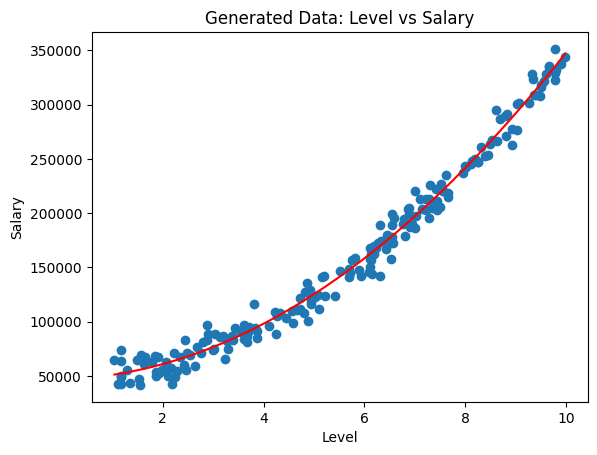

In [ ]:
plt.scatter(level, salary)
plt.plot(level, lr.predict(x), color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Generated Data: Level vs Salary")
plt.show()

**LASSO REGULARIZATION**


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# Number of rows and columns
n_rows = 1000
n_cols = 13

# Generate synthetic data with some correlation for house price prediction
data = pd.DataFrame()

# Assuming some features influencing house price
# Square footage (positive correlation)
data['square_footage'] = np.random.uniform(500, 5000, n_rows)
# Number of bedrooms (positive correlation)
data['num_bedrooms'] = np.random.randint(1, 6, n_rows)
# Number of bathrooms (positive correlation)
data['num_bathrooms'] = np.random.randint(1, 4, n_rows)
# Year built (some correlation, maybe non-linear)
data['year_built'] = np.random.randint(1900, 2024, n_rows)
# Lot size (some correlation)
data['lot_size'] = np.random.uniform(0.1, 5, n_rows) # acres
# Number of stories (some correlation)
data['num_stories'] = np.random.randint(1, 4, n_rows)
data['garage_size'] = np.random.randint(0, 4, n_rows) # number of cars
# Proximity to city center (negative correlation)
data['distance_to_city'] = np.random.uniform(1, 50, n_rows) # miles
# School rating (positive correlation)
data['school_rating'] = np.random.uniform(1, 10, n_rows)
# Crime rate (negative correlation)
data['crime_rate'] = np.random.uniform(0, 1, n_rows)
# Property tax rate (some correlation)
data['property_tax_rate'] = np.random.uniform(0.005, 0.02, n_rows)
# Neighborhood quality (positive correlation, categorical or numerical)
data['neighborhood_quality'] = np.random.randint(1, 6, n_rows) # 1 (low) to 5 (high)

for i in range(n_cols - len(data.columns)):
    data[f'feature_{i+1}'] = np.random.rand(n_rows) * 100

# Generate 'price' based on a simplified model with added noise
# Price = f(square_footage, num_bedrooms, ..., random features) + noise
base_price = (
    data['square_footage'] * 150 +
    data['num_bedrooms'] * 10000 +
    data['num_bathrooms'] * 7000 +
    (2025 - data['year_built']) * 1000 +
    data['lot_size'] * 5000 +
    data['num_stories'] * 5000 +
    data['garage_size'] * 3000 -
    data['distance_to_city'] * 500 +
    data['school_rating'] * 8000 -
    data['crime_rate'] * 20000 +
    data['neighborhood_quality'] * 15000
)

# Add contribution from random features (might not be directly related to price in reality)
for i in range(n_cols - len(data.columns)):
     base_price += data[f'feature_{i+1}'] * np.random.rand() * 100

noise = np.random.normal(0, 50000, n_rows) # Add realistic noise
data['price'] = base_price + noise
data['price'] = np.maximum(data['price'], 50000)

print(data.head())


   square_footage  num_bedrooms  num_bathrooms  year_built  lot_size  \
0     2185.430535             4              3        2003  4.211087   
1     4778.214379             3              2        1985  0.155948   
2     3793.972738             5              3        2020  3.548129   
3     3193.963179             1              2        1923  4.854260   
4     1202.083882             5              1        2021  2.244541   

   num_stories  garage_size  distance_to_city  school_rating  crime_rate  \
0            3            0         40.299875       2.062054    0.046403   
1            3            0          8.869091       7.808853    0.623960   
2            2            0         27.329684       1.857240    0.626098   
3            3            2         10.405817       1.247235    0.891201   
4            1            3         36.242487       4.632633    0.505656   

   property_tax_rate  neighborhood_quality  feature_1          price  
0           0.013267                   

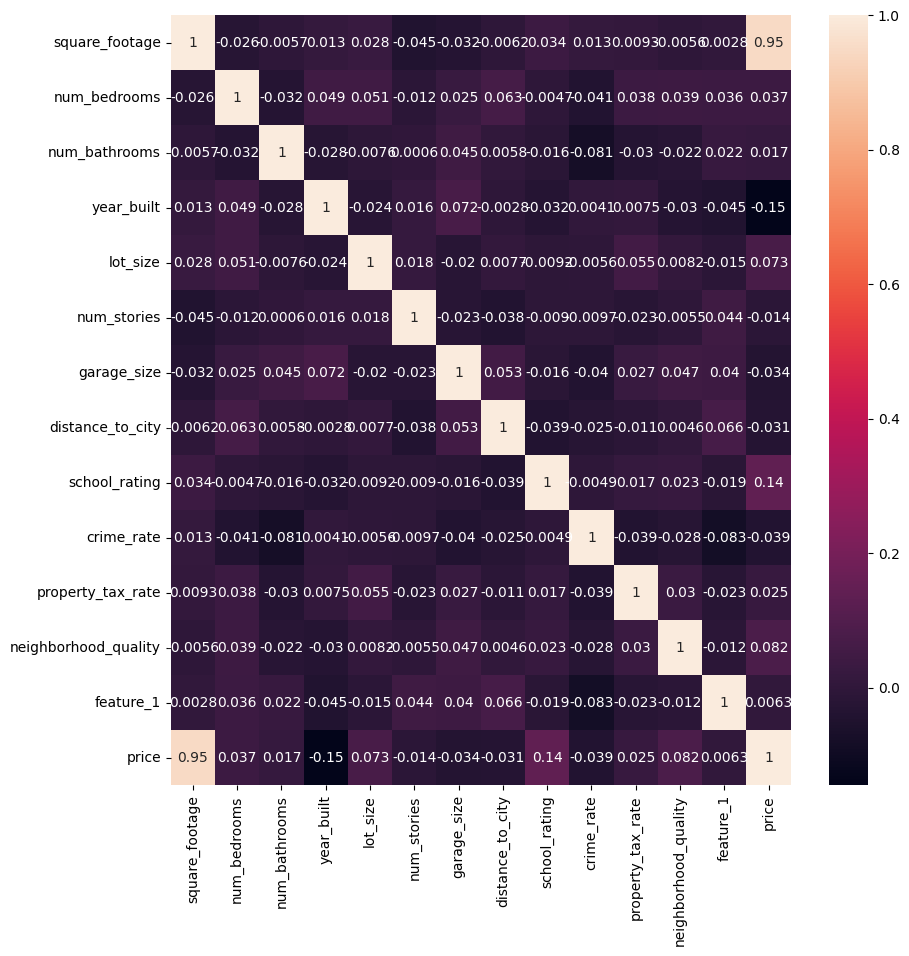

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [ ]:
x = data.iloc[:,:-1]
y = data['price']

In [ ]:
sc = StandardScaler()
# Apply StandardScaler directly to the DataFrame x
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error

**LinearRegression**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

94.95466719445518

In [ ]:
mean_squared_error(y_test, lr.predict(x_test))

2242147899.325884

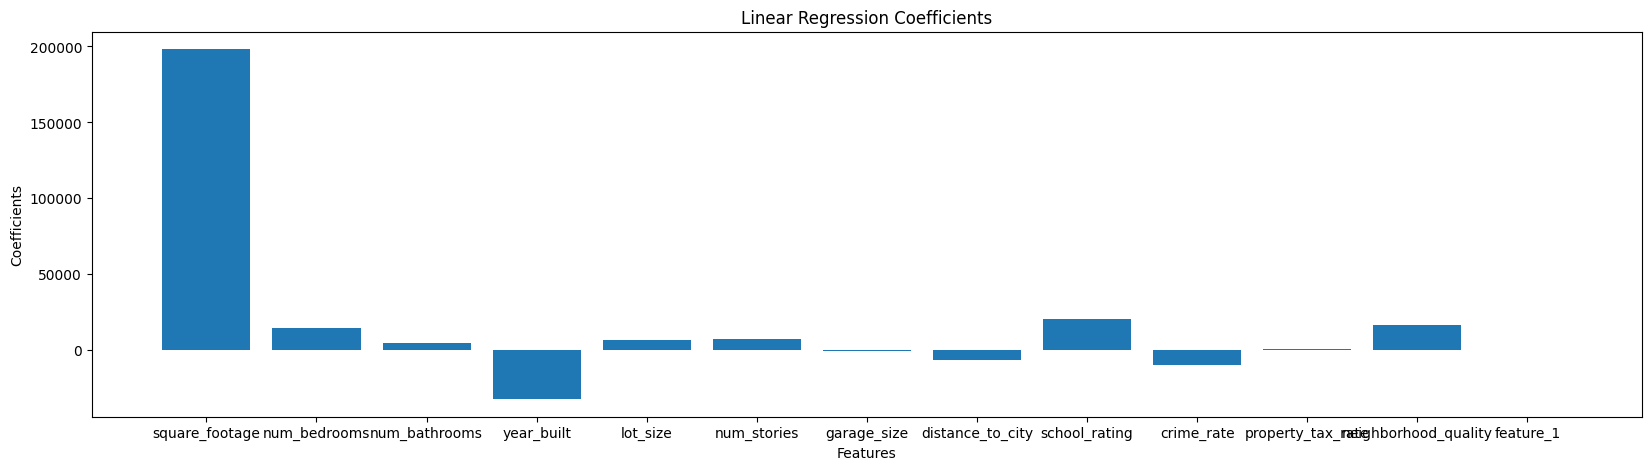

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(x.columns, lr.coef_)
plt.title("Linear Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.show()

**Lasso**

In [ ]:
la = Lasso(alpha=0.01)
la.fit(x_train, y_train)
la.score(x_test, y_test)*100

94.95466693775421

In [ ]:
mean_squared_error(y_test, la.predict(x_test))

2242148013.4038954

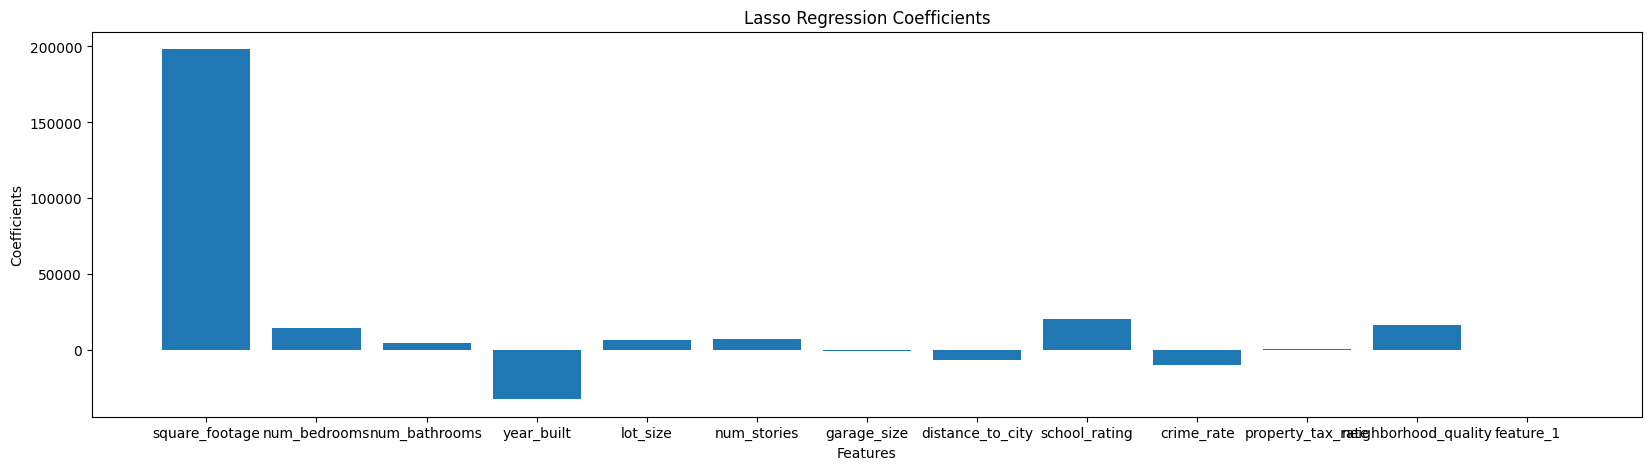

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(x.columns, la.coef_)
plt.title("Lasso Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.show()


**Ridge**

In [ ]:
rg = Ridge(alpha=0.01)
rg.fit(x_train, y_train)
rg.score(x_test, y_test)*100

94.95459033076068

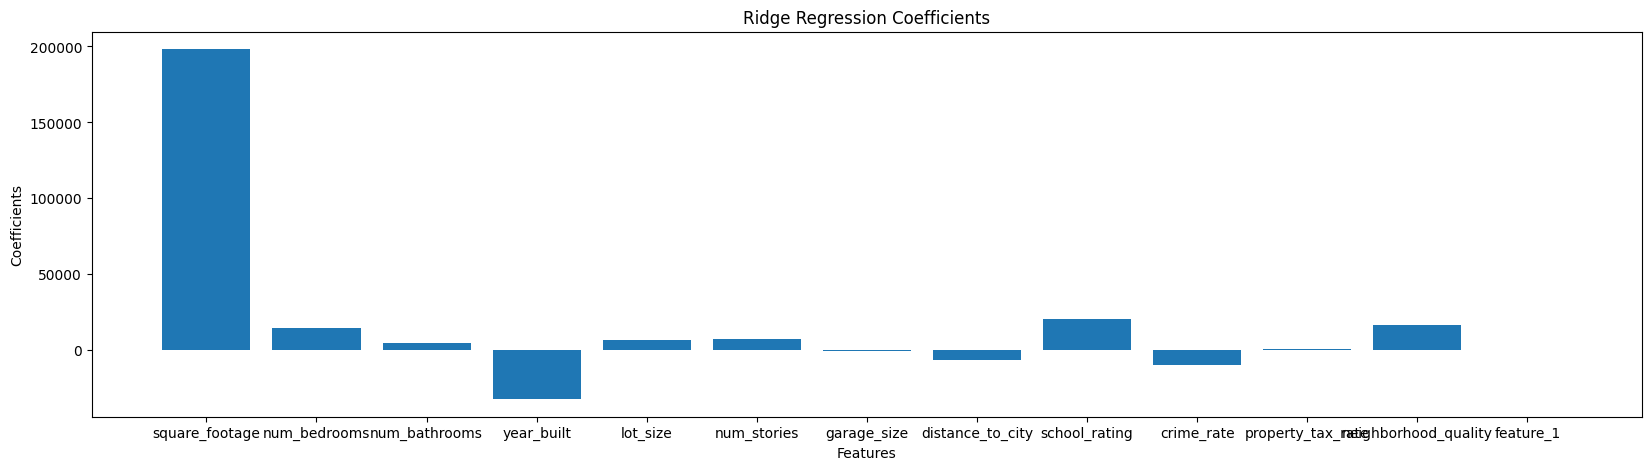

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(x.columns, rg.coef_)
plt.title("Ridge Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.show()

In [ ]:
data2 = pd.DataFrame({'LinearRegression': lr.coef_, 'Lasso': la.coef_, 'Ridge': rg.coef_}, index=x.columns)

In [ ]:
data2

,LinearRegression,Lasso,Ridge
square_footage,198253.132330,198253.122763,198250.653484
num_bedrooms,14297.994362,14297.983695,14297.739879
num_bathrooms,4513.531014,4513.520717,4513.519571
year_built,-32290.470782,-32290.461682,-32290.083232
lot_size,6666.881555,6666.873745,6666.886431
num_stories,6960.098910,6960.088364,6959.897862
garage_size,-831.528178,-831.518534,-831.614686
distance_to_city,-6236.179091,-6236.170487,-6236.109714
school_rating,20317.151431,20317.143230,20316.965273
crime_rate,-9601.596164,-9601.586505,-9601.453826
